# Sana Shaikh - Question 2

### A. Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame.

In [62]:
import pandas as pd
import numpy as np

hearts_df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
hearts_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


### B. Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [63]:
from sklearn import preprocessing

feature_cols = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']
X = hearts_df[feature_cols]

y = hearts_df['AHD'].map ({'Yes': 1, 'No': 0}) 
preprocessing.scale(X)


array([[ 0.94788279,  0.74978425, -0.25859799,  1.04743633, -0.00919313,
         1.13182982],
       [ 1.38542704,  1.59842565,  0.75330422,  1.04743633, -1.84813139,
         0.43550978],
       [ 1.38542704, -0.6646181 , -0.33496796,  1.04743633, -0.92866226,
         1.39294984],
       ...,
       [ 0.29156641, -0.09885716, -2.20603242, -0.96851989, -1.54164168,
         0.17438976],
       [ 0.29156641, -0.09885716, -0.2013205 ,  1.04743633,  1.04162873,
        -0.8700903 ],
       [-1.78676878,  0.35375159, -1.36596267, -0.96851989,  0.99784448,
        -0.8700903 ]])

### C. Split the dataset into testing and training sets:

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

### D. Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

In [65]:
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score

my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)

score_lr = accuracy_score(y_test, y_predict_lr)
print("Accuracy score: ", score_lr)

Accuracy score:  0.7183098591549296


### Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot the Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

In [67]:
y_predict_lr = my_logreg.predict(X_test) 
# ^ this will give you a final prediction for your classifier, 0 or 1

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

##### This line prints the "actual label" of the testing set:
print(y_test) 

##### This line prints the "predicted label" for the testing set:
print(y_predict_lr)

##### This line prints the "estimated likelihood of both labels" for the testing set:
print(y_predict_prob_lr)
###### ^ prints 2 columns, one is the probability of happening for "0", the other is for "1"

##### This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])
##### ^ this basically eliminates '0' or 'not cancer' and prints just 'cancer' or '1'

In [68]:
from sklearn import metrics

#from lab5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.07317073 0.07317073
 0.09756098 0.09756098 0.12195122 0.12195122 0.17073171 0.17073171
 0.2195122  0.2195122  0.24390244 0.24390244 0.29268293 0.29268293
 0.41463415 0.41463415 0.48780488 0.48780488 0.53658537 0.53658537
 0.68292683 0.68292683 0.73170732 0.73170732 0.82926829 0.82926829
 1.        ]
[0.         0.03333333 0.03333333 0.36666667 0.36666667 0.4
 0.4        0.43333333 0.43333333 0.56666667 0.56666667 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.8        0.8        0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


The FPR and TPR are both start off as 0 above. The output above shows that as you move the ROC curve forward, you increase the FPR (or false alarm rate), while at the same time, the TPR will also increase. At this point, it doesn't detect anything because the model isn't sensitive at all. as we move forward, we make our model more sensitive as it detects more and more samples. as you increase the sensitivity, you generate even more false alarm rate. that's why they're both increasing.

In [69]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC: ", AUC)

AUC:  0.7715447154471544


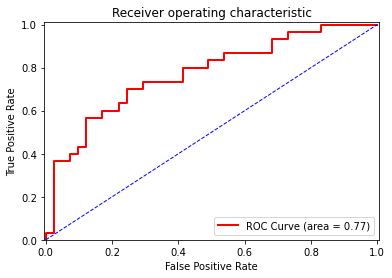

In [70]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC) # our actual roc curve

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--') # a random guess line

# define the X and Y Axis ranges:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()